# Binary Classification of Movie Reviews using IMDB dataset

This notebook covers the experiments along with the code samples found in Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). A detailed explanation about the dataset and the codes can be found [here](https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb).

In [1]:
# import keras first
!pip show keras
import keras

Name: Keras
Version: 2.4.3
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: c:\users\si_sh\anaconda3\envs\tensorflow_env\lib\site-packages
Requires: numpy, h5py, pyyaml, scipy
Required-by: 


In [2]:
from keras.datasets import imdb
# load data into train and test data and labels
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\si_sh\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\si_sh\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprec

train_data and test_data are the list of reviews encoded in a sequence of integer numbers. train_lables and test_labels are the list binary values (0s and 1s). O means negative reviews and 1 means positive reviews.

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

The following code can be used to decode the sequence of number into the original review in words.

In [5]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

As the list of integers can not be fed into the neural network directly, one-hot-encoding will be used to turn the list into vectors of 0s and 1s.

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

As the labels are already in binary format, simple numpy array is used to vectorize them.

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The Neural Network

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Introducing 'rmsprop' optimizer and 'binary_crossentropy' loss function to the model.

In [11]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Validation Set

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training the Model

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 208ms/step - loss: 0.5385 - accuracy: 0.7871 - val_loss: 0.4148 - val_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3335 - accuracy: 0.8988 - val_loss: 0.3271 - val_accuracy: 0.8789
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2412 - accuracy: 0.9242 - val_loss: 0.2834 - val_accuracy: 0.8921
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1900 - accuracy: 0.9403 - val_loss: 0.2747 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1548 - accuracy: 0.9502 - val_loss: 0.2765 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1273 - accuracy: 0.9599 - val_loss: 0.2888 - val_accuracy: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1070 - accuracy: 0.9674 - val_loss: 0.3085 - val_accuracy: 0.8854
Epoch 8/20
3

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Visualizing the loss and accuracy

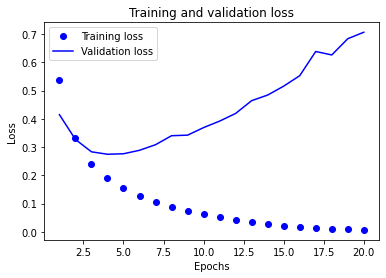

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

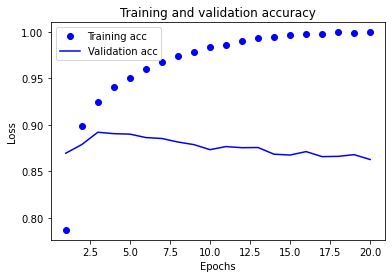

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Testing with the data

In [57]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.5196 - accuracy: 0.7762
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.3058 - accuracy: 0.9045
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2263 - accuracy: 0.9249
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2839 - accuracy: 0.8878


In [58]:
results

[0.2838740348815918, 0.8877599835395813]

In [59]:
model.predict(x_test)

array([[0.22712281],
       [0.99441624],
       [0.78549534],
       ...,
       [0.16085699],
       [0.07986555],
       [0.5374764 ]], dtype=float32)

# Further Experiments

Using one hidden layer

In [18]:
model1a = models.Sequential()
model1a.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1a.add(layers.Dense(1, activation='sigmoid'))

In [19]:
# compile
model1a.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
# train model and validate
history1a = model1a.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 111ms/step - loss: 0.5043 - accuracy: 0.8010 - val_loss: 0.4041 - val_accuracy: 0.8577
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3274 - accuracy: 0.9006 - val_loss: 0.3294 - val_accuracy: 0.8800
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2529 - accuracy: 0.9239 - val_loss: 0.3041 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2081 - accuracy: 0.9345 - val_loss: 0.2775 - val_accuracy: 0.8910
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1781 - accuracy: 0.9444 - val_loss: 0.2781 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1545 - accuracy: 0.9527 - val_loss: 0.2804 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1354 - accuracy: 0.9606 - val_loss: 0.2776 - val_accuracy: 0.8901
Epoch 8/20
3

In [21]:
history_dict1a = history1a.history
history_dict1a.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

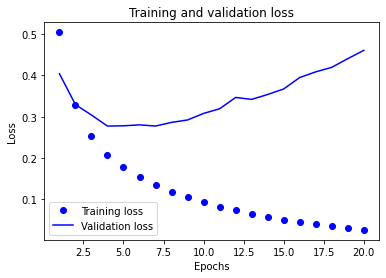

In [22]:
# plot loss
import matplotlib.pyplot as plt

acc1a = history1a.history['accuracy']
val_acc1a = history1a.history['val_accuracy']
loss1a = history1a.history['loss']
val_loss1a = history1a.history['val_loss']

epochs = range(1, len(acc1a) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss1a, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1a, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

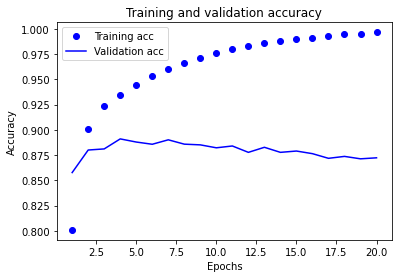

In [23]:
# plot accuracy
plt.clf()   # clear figure
acc_values1a = history_dict1a['accuracy']
val_acc_values1a = history_dict1a['val_accuracy']

plt.plot(epochs, acc1a, 'bo', label='Training acc')
plt.plot(epochs, val_acc1a, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Using three hidden layers

In [24]:
model1b = models.Sequential()
model1b.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1b.add(layers.Dense(16, activation='relu'))
model1b.add(layers.Dense(16, activation='relu'))
model1b.add(layers.Dense(1, activation='sigmoid'))

In [26]:
# compile
model1b.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [27]:
# train model and validate
history1b = model1b.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 125ms/step - loss: 0.5619 - accuracy: 0.7579 - val_loss: 0.4301 - val_accuracy: 0.8679
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3454 - accuracy: 0.8957 - val_loss: 0.3219 - val_accuracy: 0.8844
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2415 - accuracy: 0.9239 - val_loss: 0.2901 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1832 - accuracy: 0.9410 - val_loss: 0.2874 - val_accuracy: 0.8839
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1465 - accuracy: 0.9521 - val_loss: 0.3012 - val_accuracy: 0.8819
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1178 - accuracy: 0.9613 - val_loss: 0.3039 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0972 - accuracy: 0.9700 - val_loss: 0.3463 - val_accuracy: 0.8736
Epoch 8/20
3

In [30]:
# history
history_dict1b = history1b.history
history_dict1b.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

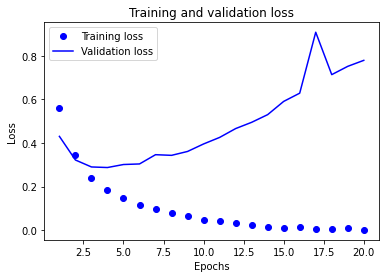

In [31]:
# plot loss
import matplotlib.pyplot as plt

acc1b = history1b.history['accuracy']
val_acc1b = history1b.history['val_accuracy']
loss1b = history1b.history['loss']
val_loss1b = history1b.history['val_loss']

epochs = range(1, len(acc1b) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss1b, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss1b, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

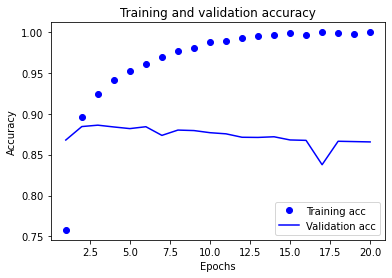

In [32]:
# plot accuracy
plt.clf()   # clear figure
acc_values1b = history_dict1b['accuracy']
val_acc_values1b = history_dict1b['val_accuracy']

plt.plot(epochs, acc1b, 'bo', label='Training acc')
plt.plot(epochs, val_acc1b, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Using 32 hidden unit size

In [33]:
model2a = models.Sequential()
model2a.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model2a.add(layers.Dense(32, activation='relu'))
model2a.add(layers.Dense(1, activation='sigmoid'))

In [34]:
# compile
model2a.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [35]:
# train model and validate
history2a = model2a.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 196ms/step - loss: 0.4927 - accuracy: 0.7839 - val_loss: 0.3622 - val_accuracy: 0.8636
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2783 - accuracy: 0.9031 - val_loss: 0.3342 - val_accuracy: 0.8590
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1997 - accuracy: 0.9315 - val_loss: 0.2891 - val_accuracy: 0.8836
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1588 - accuracy: 0.9440 - val_loss: 0.2853 - val_accuracy: 0.8862
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1197 - accuracy: 0.9599 - val_loss: 0.3121 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0978 - accuracy: 0.9677 - val_loss: 0.3330 - val_accuracy: 0.8805
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0725 - accuracy: 0.9790 - val_loss: 0.3477 - val_accuracy: 0.8822
Epoch 8/20
3

In [36]:
# history
history_dict2a = history2a.history
history_dict2a.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

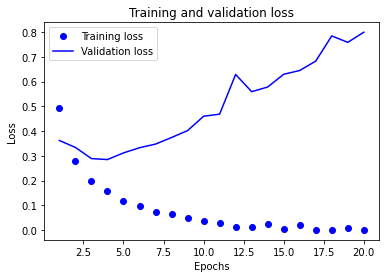

In [37]:
# plot loss
import matplotlib.pyplot as plt

acc2a = history2a.history['accuracy']
val_acc2a = history2a.history['val_accuracy']
loss2a = history2a.history['loss']
val_loss2a = history2a.history['val_loss']

epochs = range(1, len(acc2a) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss2a, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss2a, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

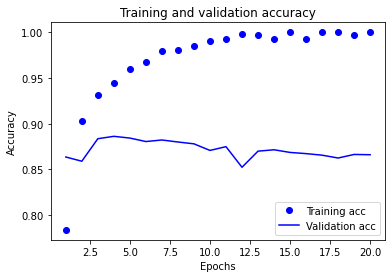

In [38]:
# plot accuracy
plt.clf()   # clear figure
acc_values2a = history_dict2a['accuracy']
val_acc_values2a = history_dict2a['val_accuracy']

plt.plot(epochs, acc2a, 'bo', label='Training acc')
plt.plot(epochs, val_acc2a, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Using 64 hidden unit size

In [39]:
model2b = models.Sequential()
model2b.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model2b.add(layers.Dense(64, activation='relu'))
model2b.add(layers.Dense(1, activation='sigmoid'))

In [40]:
# compile
model2b.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
# train model and validate
history2b = model2b.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 141ms/step - loss: 0.4847 - accuracy: 0.7769 - val_loss: 0.3257 - val_accuracy: 0.8727
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2621 - accuracy: 0.9004 - val_loss: 0.2744 - val_accuracy: 0.8920
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1812 - accuracy: 0.9353 - val_loss: 0.2833 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1380 - accuracy: 0.9503 - val_loss: 0.2964 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1095 - accuracy: 0.9593 - val_loss: 0.3561 - val_accuracy: 0.8726
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.3596 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.0559 - accuracy: 0.9837 - val_loss: 0.3901 - val_accuracy: 0.8812
Epoch 8/20
3

In [42]:
history_dict2b = history2b.history
history_dict2b.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

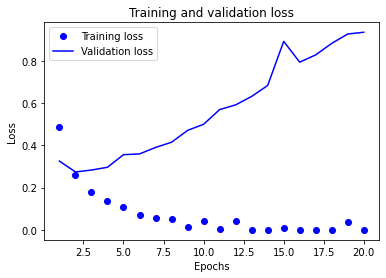

In [43]:
# plot loss
import matplotlib.pyplot as plt

acc2b = history2b.history['accuracy']
val_acc2b = history2b.history['val_accuracy']
loss2b = history2b.history['loss']
val_loss2b = history2b.history['val_loss']

epochs = range(1, len(acc2b) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss2b, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss2b, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

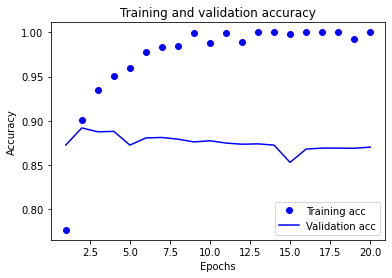

In [44]:
# plot accuracy
plt.clf()   # clear figure
acc_values2b = history_dict2b['accuracy']
val_acc_values2b = history_dict2b['val_accuracy']

plt.plot(epochs, acc2b, 'bo', label='Training acc')
plt.plot(epochs, val_acc2b, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Using the mse loss function instead of binary_crossentropy

In [45]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [46]:
# compile
model3.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

In [47]:
# train model and validate
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 102ms/step - loss: 0.1625 - accuracy: 0.7923 - val_loss: 0.1136 - val_accuracy: 0.8744
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0879 - accuracy: 0.9059 - val_loss: 0.1017 - val_accuracy: 0.8680
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0635 - accuracy: 0.9309 - val_loss: 0.0851 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0504 - accuracy: 0.9449 - val_loss: 0.0825 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0410 - accuracy: 0.9564 - val_loss: 0.0833 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0333 - accuracy: 0.9665 - val_loss: 0.0887 - val_accuracy: 0.8796
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0279 - accuracy: 0.9735 - val_loss: 0.0857 - val_accuracy: 0.8840
Epoch 8/20
3

In [48]:
# history
history_dict3 = history3.history
history_dict3.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

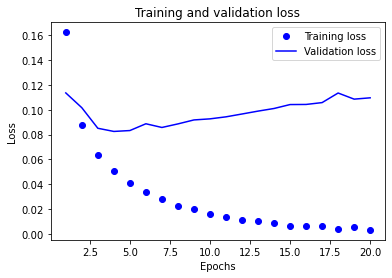

In [49]:
# plot loss
import matplotlib.pyplot as plt

acc3 = history3.history['accuracy']
val_acc3 = history3.history['val_accuracy']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

epochs = range(1, len(acc3) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss3, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

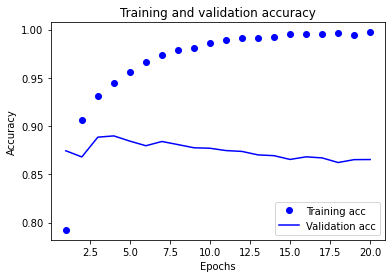

In [50]:
# plot accuracy
plt.clf()   # clear figure
acc_values3 = history_dict3['accuracy']
val_acc_values3 = history_dict3['val_accuracy']

plt.plot(epochs, acc3, 'bo', label='Training acc')
plt.plot(epochs, val_acc3, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Using tanh instead of relu activision function

In [51]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model4.add(layers.Dense(16, activation='tanh'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [52]:
# compile
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [53]:
# train model and validate
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 222ms/step - loss: 0.4911 - accuracy: 0.8031 - val_loss: 0.3644 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2845 - accuracy: 0.9081 - val_loss: 0.2901 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1990 - accuracy: 0.9358 - val_loss: 0.2768 - val_accuracy: 0.8884
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1551 - accuracy: 0.9475 - val_loss: 0.2800 - val_accuracy: 0.8838
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1173 - accuracy: 0.9615 - val_loss: 0.3314 - val_accuracy: 0.8737
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0931 - accuracy: 0.9706 - val_loss: 0.3337 - val_accuracy: 0.8784
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0721 - accuracy: 0.9781 - val_loss: 0.3709 - val_accuracy: 0.8761
Epoch 8/20
3

In [54]:
# history
history_dict4 = history4.history
history_dict4.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

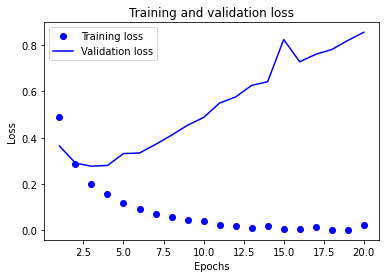

In [55]:
# plot loss
import matplotlib.pyplot as plt

acc4 = history4.history['accuracy']
val_acc4 = history4.history['val_accuracy']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

epochs = range(1, len(acc4) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss4, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

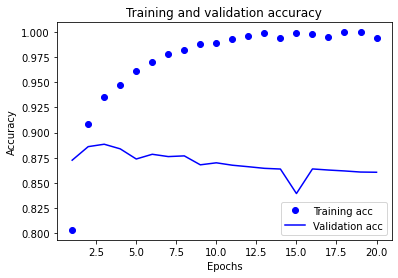

In [56]:
# plot accuracy
plt.clf()   # clear figure
acc_values4 = history_dict4['accuracy']
val_acc_values4 = history_dict4['val_accuracy']

plt.plot(epochs, acc4, 'bo', label='Training acc')
plt.plot(epochs, val_acc4, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Based on these experiment the best model can be selected to predict more effeciently.